# 5. 토큰화 Tokenizing

## 5-a. 토큰화 계획
- word extraction 한 단어 리스트로 사용자 정의 사전을 만든다
- mecab 이용하여 tokenizing 한다

## 5-b. 토큰화 프로세스
1. mecab 을 컴파일하고, 테스트한다
  - 테스트할 text 를 제작한다
  - 토큰화 테스트
2. word extraction의 결과 단어 리스트를 불러온다
3. 사용자 정의 사전을 제작하고, .csv 파일로 저장해둔다
  - 종성이 있는지 판단한다
4. 여기까지 함수화한다 (단어 리스트 불러오기 + 사용자 정의 사전 파일로 저장)
5. 사용자 정의 사전을 `C:\mecab\user-dic` 에 옮긴다
6. 사용자 정의 사전을 컴파일한다
7. 토큰화 한다
  - [1-a] 의 text로 테스트를 진행한다
  - 변화가 있는지 체크한다

## 5-c. 사용자 정의사전 만들기

### 5-c-1. mecab 컴파일
- Mecab 메뉴얼 : https://kain7f1.notion.site/Mecab-195acbade3f14463b137c4490baebc76?pvs=4

### 5-c-2. (pycharm으로 실행) macab 토큰화 테스트

In [4]:
# 메뉴얼에 따라 빌드하고, pycharm에서 테스트합니다
import MeCab

txt1 = "주식으로 선거때마다 한탕 해처먹는 간잽이진짜 확망했으면"
m = MeCab.Tagger()
tokens = m.parse(txt1)
print(tokens)

ModuleNotFoundError: No module named 'MeCab'

### 5-c-3. word extraction의 결과 단어 리스트를 불러오기
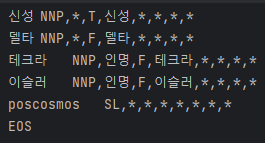

In [1]:
# 텍스트 파일을 열고 읽기
file_path = "4_word_list.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 줄바꿈 문자 제거
word_list = [line.strip() for line in lines]

# 결과 출력
print(word_list)

['잃고', 'ㅂㅅ', '얼마', '죤나', '병신', '면제', '획득', '존나', '분명', '디램', '갖고', '승리', '한번', '격차', '대한', '접고', '훨씬', '읽고', '씨발', '금융', '독일', '솔까', '매출', '흥행', '담주', '설명', '티커', '휠라', '싸게', '파이', '플랜', '키트', '다들', '듣고', '고수', '서버', '양산', '믿고', '표현', '토막', '와라', '취업', '농심', '향후', '견제', '줜나', 'ㅌㅌ', '멜론', '좀더', '찍고', '향해', '임상', '복지', '페북', '뜬거', '흑우', '좀만', '힛자', '삽질', '새끼', '쉴드', '겨울', '경제', '큰데', '벨류', '윈도', '좆망', '관심', '싫음', '덩치', '꽤나', '랜덤', '닉값', '거기', '침체', '영익', '서울', '낮음', '축하', '온갖', '싶음', '시장', '숫자', '십년', '횡령', '딱히', '실적', '흐음', 'ㅋㅋ', '쓰고', '쟤네', '없음', '한국', '볼때', '절반', '쉬움', '블소', '버블', '생산', '컨콜', '작전', '틀딱', '패치', '시간', 'ㅈㄴ', '앰창', '빼면', '맥주', '남자', '변화', '임금', '결국', '몰빵', '성장', '역시', '찬성', '세력', '투자', '집단', '벌고', '하닉', '아님', '앨범', 'ㅉㅉ', '털고', '손실', '색히', '몽골', '행님', '냠냠', '줍줍', '음봉', '핵심', '롱숏', '분할', '꼴랑', '목록', '혁신', 'ㅁㅊ', '제일', '퀀텀', '베팅', '완료', '되면', '미친', '꽁돈', '인수', '세금', '될지', '금액', '동안', '습관', '빨리', '혐의', '협상', '시작', '광산', '광고', '필요', '꺼져', '범수', 'ㄹㅇ', '년간', '겨우', '웹젠', '환경', '뒤져

In [2]:
len(word_list)

3953

### 5-c-4. 사용자 정의 사전 만들기

In [4]:
import numpy as np
import pandas as pd

# 단어의 마지막 글자에 종성이 있는지 체크하는 함수
def has_jongseong(char):
    if '가' <= char <= '힣':
        unicode_value = ord(char)
        jongseong = (unicode_value - 0xAC00) % 28
        return jongseong != 0
    else:
        return False

data = []  # 사전에 들어갈 형태로 가공해서 넣을거임
for word in word_list:
    if len(word) == 0:
        continue
    if has_jongseong(word[-1]):  # 마지막 글자에 종성이 있으면 'T' 없으면 'F'
        jongseong = 'T'
    else:
        jongseong = 'F'
    # 사전 파일인 nnp.csv에 맞는 형식으로 데이터를 세팅함
    new_row = [word, np.nan, np.nan, 0, 'NNP', '*', jongseong, word, '*', '*', '*', '*']
    data.append(new_row)

df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,잃고,NaN,NaN,0,NNP,*,F,잃고,*,*,*,*
1,ㅂㅅ,NaN,NaN,0,NNP,*,F,ㅂㅅ,*,*,*,*
2,얼마,NaN,NaN,0,NNP,*,F,얼마,*,*,*,*
3,죤나,NaN,NaN,0,NNP,*,F,죤나,*,*,*,*
4,병신,NaN,NaN,0,NNP,*,T,병신,*,*,*,*


In [5]:
fpath_to_save = 'user_dict_stock.csv'
df.to_csv(fpath_to_save, index=False, encoding="utf-8", header=False)
print(f'{fpath_to_save} 파일이 생성되었습니다')

user_dict_stock.csv 파일이 생성되었습니다


### 5-c-5. 사용자 정의 사전 제작 함수화

In [1]:
import numpy as np
import pandas as pd

def make_user_dict(fpath_word_list, fpath_user_dict):
    # 1. word_list 파일 읽어오기
    print("[progress 1/3] word_list 파일 읽어오기")
    with open(fpath_word_list, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    word_list = [line.strip() for line in lines]  # 줄바꿈 문자 제거

    # 단어의 마지막 글자에 종성이 있는지 체크하는 함수
    def has_jongseong(char):
        if '가' <= char <= '힣':
            unicode_value = ord(char)
            jongseong = (unicode_value - 0xAC00) % 28
            return jongseong != 0
        else:
            return False

    # 2. mecab 사전의 형식으로 데이터 가공하기
    print("[progress 2/3] mecab 사전의 형식으로 데이터 가공하기")
    data = []  # 사전에 들어갈 형태로 가공해서 넣을거임
    for word in word_list:
        if len(word) == 0:
            continue
        if has_jongseong(word[-1]):  # 마지막 글자에 종성이 있으면 'T' 없으면 'F'
            jongseong = 'T'
        else:
            jongseong = 'F'
        # 사전 파일인 nnp.csv에 맞는 형식으로 데이터를 세팅함
        new_row = [word, np.nan, np.nan, 0, 'NNP', '*', jongseong, word, '*', '*', '*', '*']
        data.append(new_row)
    
    df = pd.DataFrame(data)

    # 3. 가공한 데이터를 파일로 저장하기
    print("[progress 3/3] 가공한 데이터를 파일로 저장하기")
    df.to_csv(fpath_user_dict, index=False, encoding="utf-8", header=False)
    print(f"{fpath_user_dict} 파일이 생성되었습니다")

    print("[done]")

### 5-c-6. 함수 테스트

In [2]:
fpath_word_list = "4_ecopro_word_list.txt"
fpath_user_dict = "user_dict_ecopro.csv"

make_user_dict(fpath_word_list, fpath_user_dict)

[progress 1/3] word_list 파일 읽어오기
[progress 2/3] mecab 사전의 형식으로 데이터 가공하기
[progress 3/3] 가공한 데이터를 파일로 저장하기
user_dict_ecopro.csv 파일이 생성되었습니다
[done]


## 5-d. 사용자 정의 사전 컴파일
- 사용자 정의 사전을 옮긴다 : C:\mecab\user-dic
- Windows ProwerShell ISE 를 켠다
- cd C:\mecab
- .\tools\add-userdic-win.ps1

## 5-e. 토큰화 Tokenizing

### 5-e-1. 토큰화는 test_tokenizing.py 로 진행한다
### 5-e-2. tokens 칼럼이 생성된 파일을 저장한다